In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('dim_customers.csv')
df2=pd.read_csv('fact_spends.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [5]:
df3=df1.merge(df2,how='inner', on='customer_id')

In [6]:
pd.set_option('display.max.column',15)

In [7]:
df3

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [8]:
df4=df3.groupby('age_group')['customer_id'].nunique()
df4


age_group
21-24     691
25-34    1498
35-45    1273
45+       538
Name: customer_id, dtype: int64

Text(0.5, 1.0, 'Distribution of customers by Age Group')

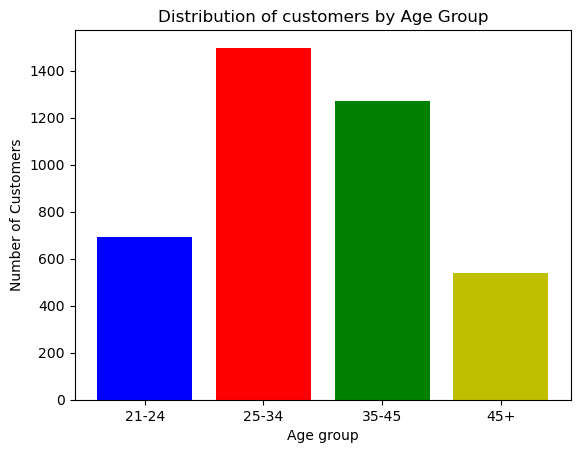

In [9]:
plt.bar(df4.index,df4, color=['b','r','g','y'])
plt.xlabel('Age group')
plt.ylabel('Number of Customers')
plt.title('Distribution of customers by Age Group')

In [10]:
df5=df3.groupby(['age_group','gender'])['customer_id'].nunique()
df5

age_group  gender
21-24      Female    257
           Male      434
25-34      Female    532
           Male      966
35-45      Female    439
           Male      834
45+        Female    175
           Male      363
Name: customer_id, dtype: int64

In [11]:
df5=pd.DataFrame(df5)
df5

customer_id
age_group gender             
21-24     Female          257
          Male            434
25-34     Female          532
          Male            966
35-45     Female          439
          Male            834
45+       Female          175
          Male            363

Text(0, 0.5, 'number of individuals')

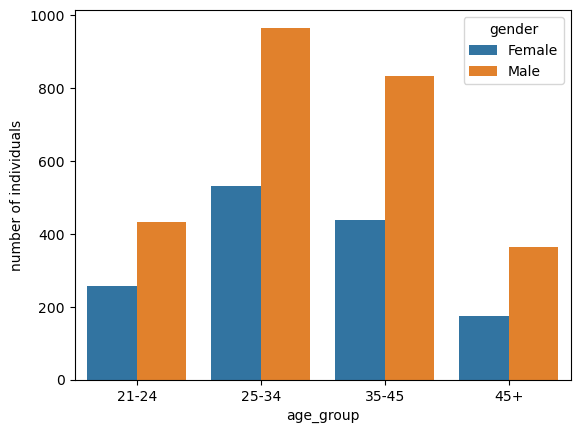

In [12]:
sns.barplot(data=df5, x='age_group', y='customer_id', hue='gender')
plt.ylabel('number of individuals')

In [13]:
df6=df3.groupby(['age_group','gender'])['spend'].sum()
df6

age_group  gender
21-24      Female     24571514
           Male       43951563
25-34      Female     67066968
           Male      136290216
35-45      Female     61761040
           Male      128878788
45+        Female     20360196
           Male       48017470
Name: spend, dtype: int64

In [14]:
df6=pd.DataFrame(df6)
df6

spend
age_group gender           
21-24     Female   24571514
          Male     43951563
25-34     Female   67066968
          Male    136290216
35-45     Female   61761040
          Male    128878788
45+       Female   20360196
          Male     48017470

Text(0, 0.5, 'Amount spend')

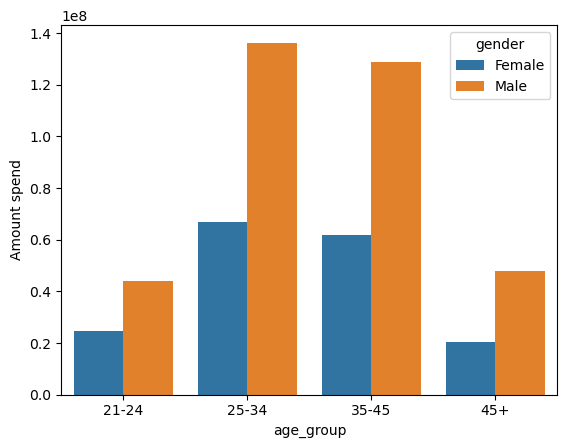

In [15]:
sns.barplot(data=df6, x='age_group', y='spend', hue='gender')
plt.ylabel('Amount spend')

In [16]:
df7=(df3.groupby(['age_group','gender'])['spend'].sum())/((df3.groupby(['age_group','gender'])['customer_id'].nunique()))
df7=df7.reset_index()
df7

,age_group,gender,0
0,21-24,Female,95609.003891
1,21-24,Male,101270.882488
2,25-34,Female,126065.729323
3,25-34,Male,141087.180124
4,35-45,Female,140685.740319
5,35-45,Male,154530.920863
6,45+,Female,116343.977143
7,45+,Male,132279.531680


Text(0.5, 1.0, 'Average money Spend by individual of different age groups')

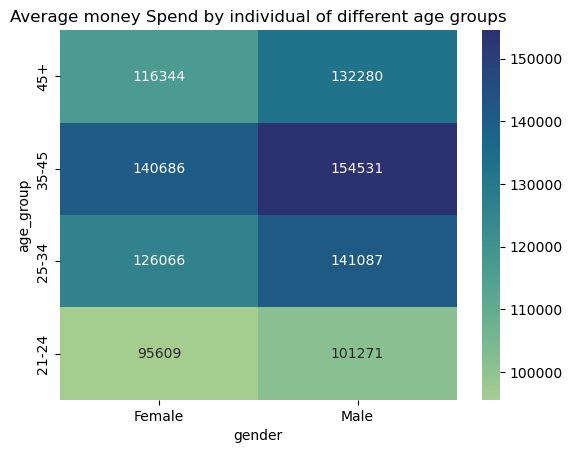

In [17]:
map_points=df7.pivot(index='age_group', columns='gender', values=0)
map_points.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(map_points, annot=True, fmt='.0f', cmap='crest')
plt.title('Average money Spend by individual of different age groups')

In [18]:
df8=(df3.groupby('occupation')['spend'].sum()/df3.groupby('occupation')['customer_id'].nunique()).reset_index()
df8.sort_values(by=0, ascending=False, inplace=True)
df8

,occupation,0
3,Salaried IT Employees,188346.448223
0,Business Owners,139690.014286
4,Salaried Other Employees,97997.408735
1,Freelancers,96350.303571
2,Government Employees,90532.375940


Text(0.5, 1.0, 'Average Spending by Occupation')

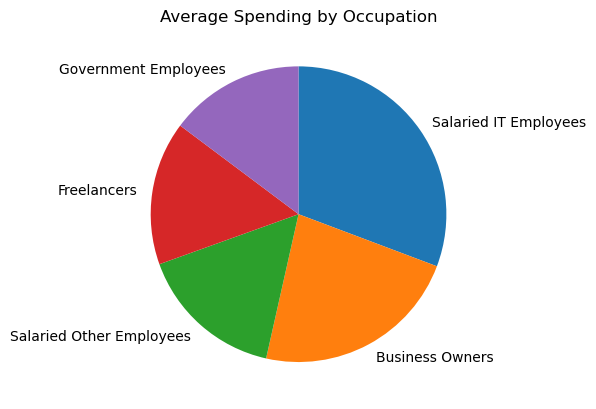

In [19]:
plt.pie(df8[0],labels=df8['occupation'], counterclock=False, startangle=90)
plt.title('Average Spending by Occupation')

In [20]:
df3.sort_values(by='customer_id')

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
88125,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,June,Groceries,Debit Card,442
87990,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,October,Entertainment,Net Banking,612
87989,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,July,Apparel,Net Banking,353
87988,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,July,Electronics,Credit Card,2071
87987,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,October,Apparel,Credit Card,1039
...,...,...,...,...,...,...,...,...,...,...,...
638791,ATQCUS4000,25-34,Chennai,Government Employees,Female,Single,50901,July,Entertainment,UPI,98
638792,ATQCUS4000,25-34,Chennai,Government Employees,Female,Single,50901,May,Entertainment,UPI,51
638793,ATQCUS4000,25-34,Chennai,Government Employees,Female,Single,50901,August,Health & Wellness,Net Banking,155
638795,ATQCUS4000,25-34,Chennai,Government Employees,Female,Single,50901,July,Entertainment,Credit Card,214


In [21]:
df9=df3.groupby(['customer_id','month']).agg({'spend':['sum'], 'avg_income':['mean']})
df9=pd.DataFrame(df9)
df9

spend avg_income
                         sum       mean
customer_id month                      
ATQCUS0001  August     33776    49767.0
            July       29451    49767.0
            June       26316    49767.0
            May        19480    49767.0
            October    25262    49767.0
...                      ...        ...
ATQCUS4000  July        8456    50901.0
            June        8874    50901.0
            May         7497    50901.0
            October     9171    50901.0
            September   8972    50901.0

[24000 rows x 2 columns]

In [22]:
df10=df9.groupby('customer_id').sum()
df10=pd.DataFrame(df10)
df10.reset_index(inplace=True)
df10

,customer_id,spend,avg_income
,,sum,mean
0,ATQCUS0001,170545,298602.0
1,ATQCUS0002,168514,284016.0
2,ATQCUS0003,157534,293106.0
3,ATQCUS0004,162655,272550.0
4,ATQCUS0005,157296,280392.0
...,...,...,...
3995,ATQCUS3996,99589,408018.0
3996,ATQCUS3997,56264,199938.0
3997,ATQCUS3998,59760,200016.0


In [23]:
df10['%spend']=df10['spend','sum']/df10['avg_income','mean']*100
df10

,customer_id,spend,avg_income,%spend
,,sum,mean,
0,ATQCUS0001,170545,298602.0,57.114487
1,ATQCUS0002,168514,284016.0,59.332573
2,ATQCUS0003,157534,293106.0,53.746426
3,ATQCUS0004,162655,272550.0,59.678958
4,ATQCUS0005,157296,280392.0,56.098605
...,...,...,...,...
3995,ATQCUS3996,99589,408018.0,24.407992
3996,ATQCUS3997,56264,199938.0,28.140724
3997,ATQCUS3998,59760,200016.0,29.877610


In [24]:
df10.columns=['customer_id','total_spend', 'total_income', 'avg_income_uti%']

In [25]:
df11=df1.merge(df10, how='inner', on='customer_id')
df11

,customer_id,age_group,city,occupation,gender,marital status,avg_income,total_spend,total_income,avg_income_uti%
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,194404,441138.0,44.068749
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,99112,239532.0,41.377353
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,69102,226212.0,30.547451
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,122309,324540.0,37.686880
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,73506,170256.0,43.173809
...,...,...,...,...,...,...,...,...,...,...
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805,117893,436830.0,26.988302
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343,125772,248058.0,50.702658
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948,247290,395688.0,62.496209
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589,107354,315534.0,34.022958


In [26]:
df12=df11.groupby(['age_group','occupation'])['avg_income_uti%'].mean()
df12=pd.DataFrame(df12)
df12.reset_index(inplace=True)
df12

,age_group,occupation,avg_income_uti%
0,21-24,Business Owners,31.384583
1,21-24,Freelancers,42.474176
2,21-24,Government Employees,26.657182
3,21-24,Salaried IT Employees,47.250250
4,21-24,Salaried Other Employees,38.796893
5,25-34,Business Owners,34.897154
6,25-34,Freelancers,46.922379
7,25-34,Government Employees,30.179151
8,25-34,Salaried IT Employees,52.485370
9,25-34,Salaried Other Employees,43.426253


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Salaried IT Employees'),
  Text(1, 0, 'Salaried Other Employees'),
  Text(2, 0, 'Government Employees'),
  Text(3, 0, 'Freelancers'),
  Text(4, 0, 'Business Owners')])

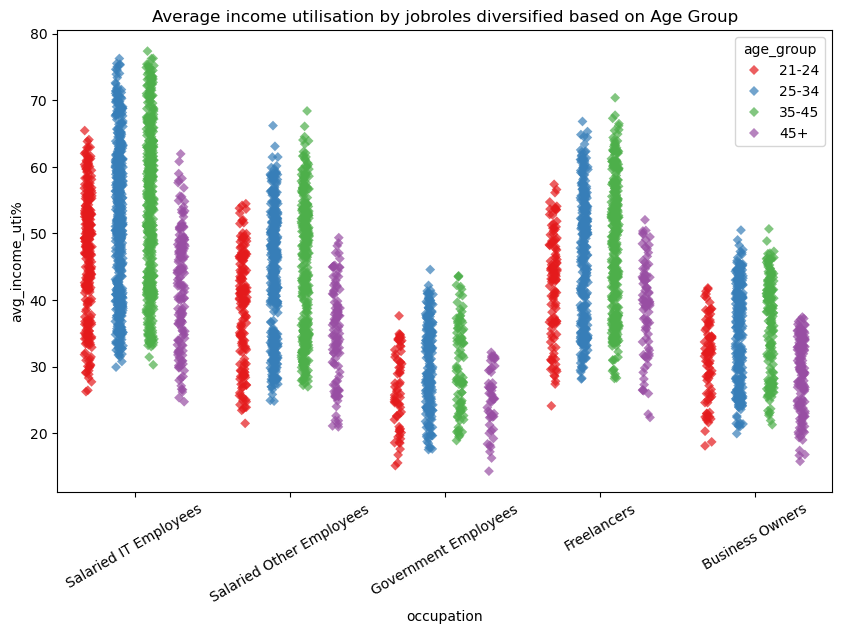

In [27]:
plt.figure(figsize=(10,6))
a=sns.stripplot(data=df11, x='occupation', y='avg_income_uti%', hue='age_group', palette='Set1',
                dodge=True, marker='D', s=5, alpha=0.7, hue_order=['21-24','25-34','35-45','45+'])
plt.title('Average income utilisation by jobroles diversified based on Age Group')
plt.xticks(rotation=30)

In [28]:
df3

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [29]:
df13=df3.groupby('category')['spend'].sum()
df13=pd.DataFrame(df13).reset_index().sort_values(by='spend', ascending=False)
df13

,category,spend
1,Bills,104912768
5,Groceries,86303761
2,Electronics,79562220
6,Health & Wellness,65599867
8,Travel,59223324
4,Food,44013470
3,Entertainment,41289162
0,Apparel,34036001
7,Others,15957182


Text(0.5, 1.0, 'Spending on different Categories')

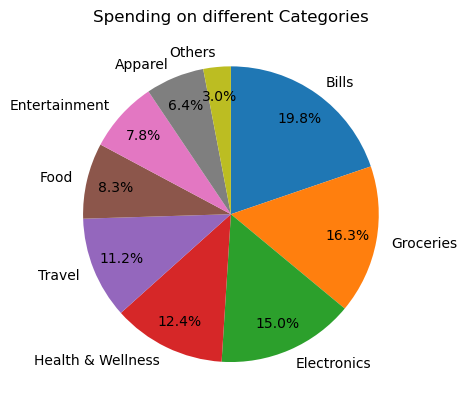

In [30]:
plt.pie(df13['spend'],labels=df13['category'], counterclock=False, startangle=90, autopct='%1.1f%%', pctdistance=0.8)
plt.title('Spending on different Categories')

In [31]:
df14=df3.groupby(['category','city'])['spend'].sum()/df3.groupby(['category','city'])['customer_id'].nunique()
df14=pd.DataFrame(df14).reset_index()
df14.rename(columns={0:'Avg money spend(in Thousands)'}, inplace=True)
df14['Avg money spend(in Thousands)']=df14['Avg money spend(in Thousands)']/1000
df14


,category,city,Avg money spend(in Thousands)
0,Apparel,Bengaluru,8.283864
1,Apparel,Chennai,5.623345
2,Apparel,Delhi NCR,9.480995
3,Apparel,Hyderabad,6.979708
4,Apparel,Mumbai,11.068759
5,Bills,Bengaluru,26.612403
6,Bills,Chennai,19.562537
7,Bills,Delhi NCR,29.794386
8,Bills,Hyderabad,22.908796
9,Bills,Mumbai,30.482150


Text(0.5, 1.0, 'Average money spend(in thousands) in each city')

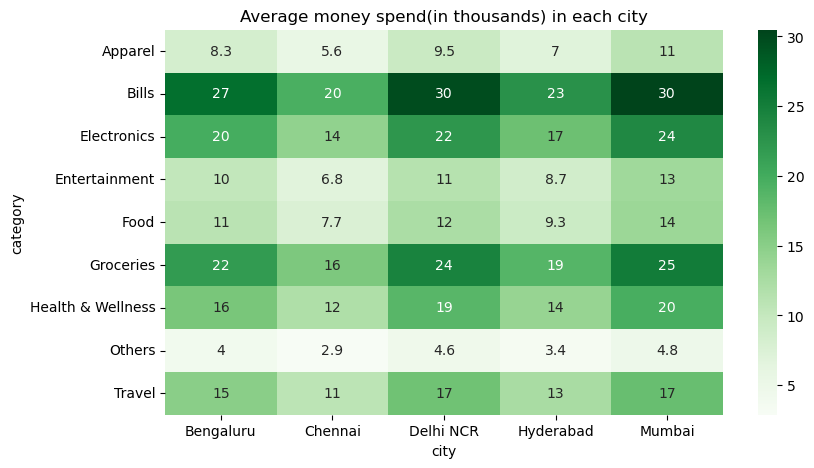

In [32]:
plt.figure(figsize=(9,5))
norm_data=df14.pivot(index='category', columns='city', values='Avg money spend(in Thousands)')
sns.heatmap(norm_data, annot=True, cmap='Greens')
plt.title('Average money spend(in thousands) in each city')

In [33]:
df15=df3.groupby(['age_group','category'])['spend'].sum()/df3.groupby(['age_group','category'])['customer_id'].nunique()
df15=pd.DataFrame(df15).reset_index()
df15=df15.rename(columns={0:'Avg Spend'})
df15=df15.pivot(index='category', columns='age_group', values='Avg Spend').reset_index()
df15

age_group,category,21-24,25-34,35-45,45+
0,Apparel,16119.952243,6021.837116,8077.981932,6678.682156
1,Bills,5084.949349,29343.014019,33054.074627,28560.215613
2,Electronics,16460.136035,21977.388518,21877.107620,13785.464684
3,Entertainment,21884.567294,8510.616155,7721.248233,6670.769517
4,Food,13451.112880,10162.455274,11285.584446,9533.167286
5,Groceries,8111.305355,25044.237650,24869.304792,21419.992565
6,Health & Wellness,9131.713459,12456.941255,23648.613511,19562.583643
7,Others,2998.962373,4088.386515,4487.012569,3807.674721
8,Travel,5922.390738,18147.582777,14735.417910,17077.483271


Text(0.5, 1.0, 'Age group vs Average spending on different Category')

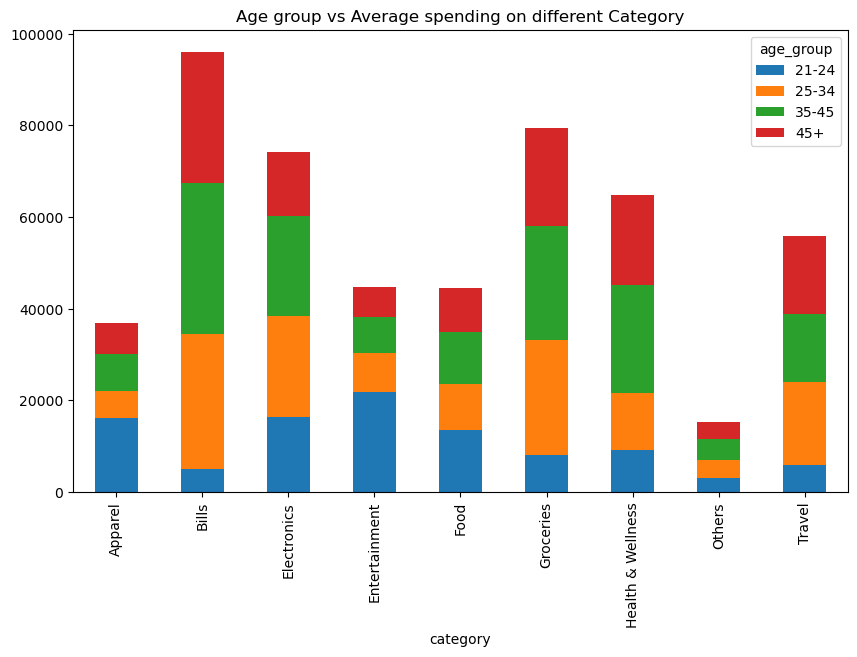

In [34]:
df15.plot(x='category', kind='bar', stacked=True, figsize=(10,6))
plt.title('Age group vs Average spending on different Category')

In [73]:
df16=df3.groupby(['marital status','gender','payment_type'])['spend'].sum()/df3.groupby(['marital status','gender','payment_type'])['customer_id'].nunique()
df16=pd.DataFrame(df16).reset_index()
df16

,marital status,gender,payment_type,0
0,Married,Female,Credit Card,53406.288732
1,Married,Female,Debit Card,29282.098592
2,Married,Female,Net Banking,13174.624120
3,Married,Female,UPI,31625.463908
4,Married,Male,Credit Card,57792.994500
5,Married,Male,Debit Card,32622.775000
6,Married,Male,Net Banking,15031.413000
7,Married,Male,UPI,36654.150000
8,Single,Female,Credit Card,42838.138577
9,Single,Female,Debit Card,21871.707865


Text(0.5, 1.0, 'Average spending by different modes of payment')

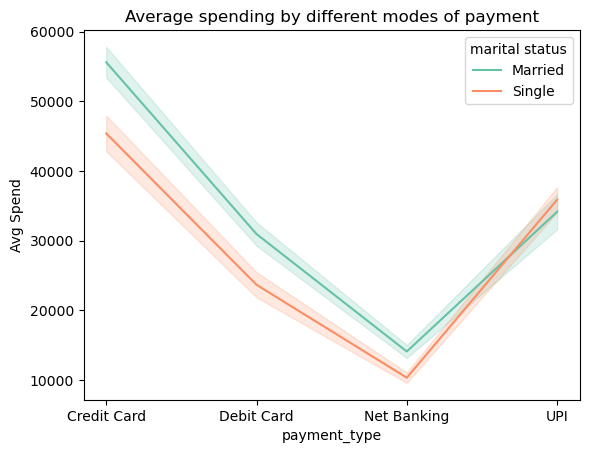

In [76]:
sns.lineplot(data=df16, x='payment_type', y=0, hue='marital status', palette='Set2')
plt.ylabel('Avg Spend')
plt.title('Average spending by different modes of payment')

Text(0.5, 1.0, 'Average spending by different modes of payment')

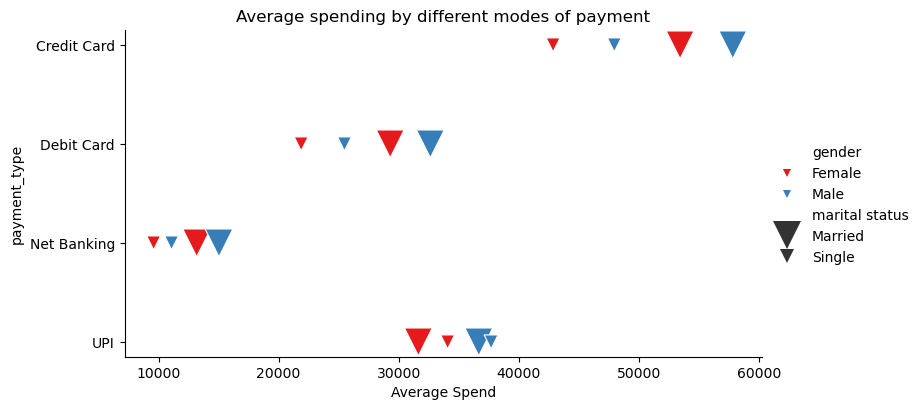

In [140]:
sns.relplot(y='payment_type', x=0, size='marital status', hue="gender", data=df16,  sizes=(100, 400), palette="Set1",
            height=4, aspect=2, marker='v')
plt.xlabel('Average Spend')
plt.title('Average spending by different modes of payment')

In [129]:
df1.groupby('occupation')['customer_id'].nunique()

occupation
Business Owners              630
Freelancers                  784
Government Employees         399
Salaried IT Employees       1294
Salaried Other Employees     893
Name: customer_id, dtype: int64

In [130]:
df1

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376
...,...,...,...,...,...,...,...
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589


In [170]:
df17=df1.groupby(['city', 'occupation'])['customer_id'].nunique()
df17=pd.DataFrame(df17).reset_index()
df17

,city,occupation,customer_id
0,Bengaluru,Business Owners,115
1,Bengaluru,Freelancers,191
2,Bengaluru,Government Employees,76
3,Bengaluru,Salaried IT Employees,226
4,Bengaluru,Salaried Other Employees,143
5,Chennai,Business Owners,115
6,Chennai,Freelancers,151
7,Chennai,Government Employees,92
8,Chennai,Salaried IT Employees,257
9,Chennai,Salaried Other Employees,219


Text(0, 0.5, 'number of people')

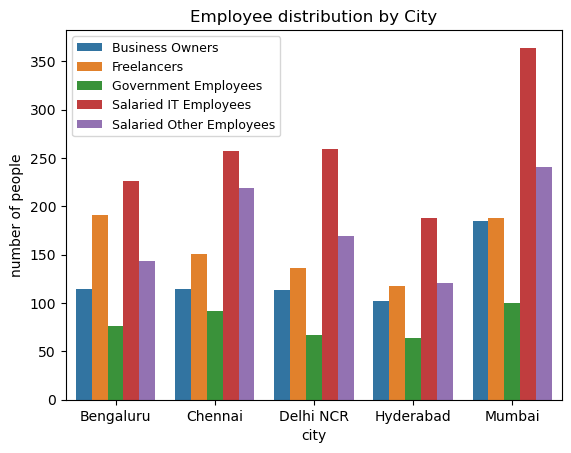

In [193]:
sns.barplot(data=df17, x='city', y='customer_id', hue='occupation')
plt.legend(prop={'size': 9})
plt.title('Employee distribution by City')
plt.ylabel('number of people')